<a href="https://colab.research.google.com/github/Actarc/PrActicaMod6/blob/master/Proyecto_Miner%C3%ADa_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

%matplotlib inline

# Agregue estas librerias que se usan para Random Forest
from pandas import Series, DataFrame
import os
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier


In [0]:
df = pd.read_csv('AB_NYC_2019.csv', encoding = 'ISO-8859-1')

In [24]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.72,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05/07/2019,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22/06/2019,0.59,1,129


In [25]:
df.describe()
#Para esta tabla ya fue imputado el valor de la mediana en la columna reviews_per:month que es 0.72
#Además, eliminamos los outliers para la variable precio, aquellos que eran mayores que USD 200 que representan un total de
# 8,384 registros que represetan el 18% de los datos totales

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.051100e+04,4.051100e+04,40511.000000,40511.000000,40511.000000,40511.000000,40511.000000,40511.000000,40511.000000,40511.000000
mean,1.874669e+07,6.550497e+07,40.727687,-73.947738,101.617388,6.744242,24.651996,1.260987,4.320580,105.378243
std,1.081483e+07,7.646290e+07,0.057036,0.046957,47.446366,20.006215,46.236355,1.566227,19.678974,128.809029
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.415846e+06,7.798193e+06,40.687580,-73.978285,62.000000,1.000000,1.000000,0.260000,1.000000,0.000000
50%,1.933266e+07,3.054504e+07,40.719420,-73.952050,95.000000,2.000000,6.000000,0.720000,1.000000,35.000000
75%,2.844061e+07,1.033452e+08,40.764030,-73.930380,139.000000,5.000000,26.000000,1.650000,2.000000,201.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,200.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


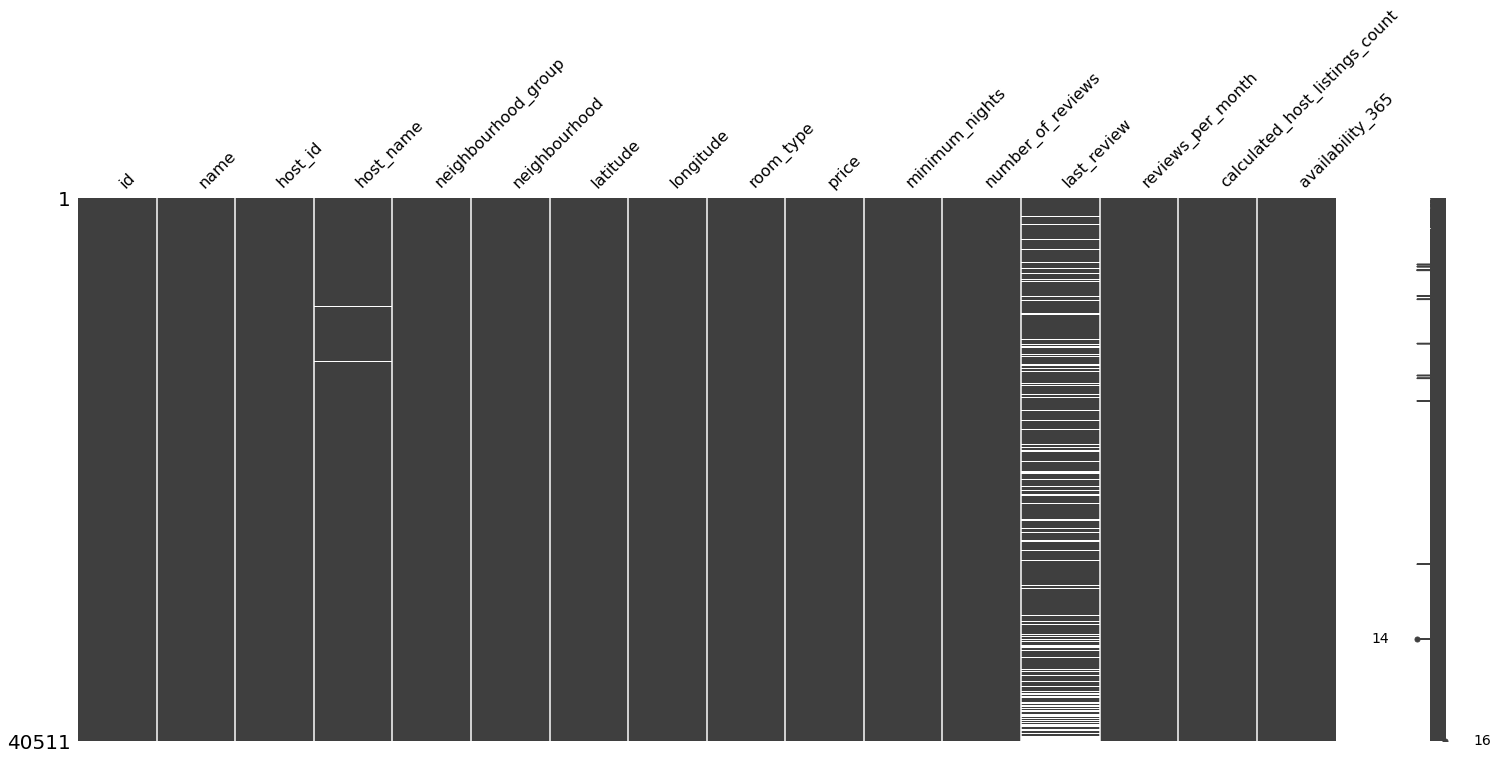

In [26]:
msno.matrix(df)
#Esta tabla es equivalente a la de abajo, consideraría eliminar esta

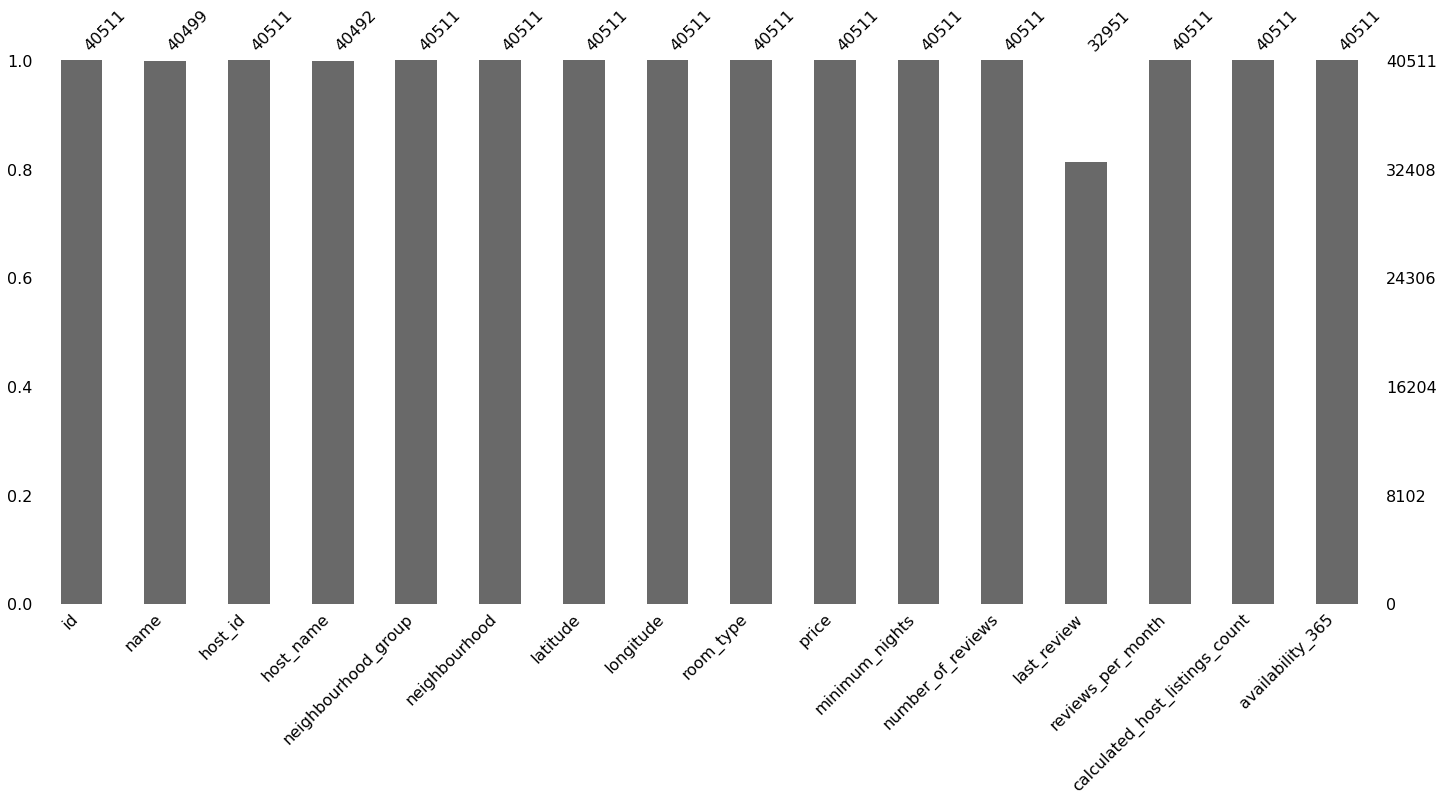

In [27]:
msno.bar(df)

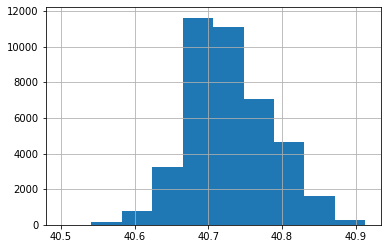

In [28]:
df.latitude.hist()
#df.longitude.hist()
#df.price.hist()
#df.minimum_nights.hist()
#df.number_of_reviews.hist()
#df.reviews_per_month.hist()
#df.calculated_host_listings_count.hist()
#df.availability_365.hist()

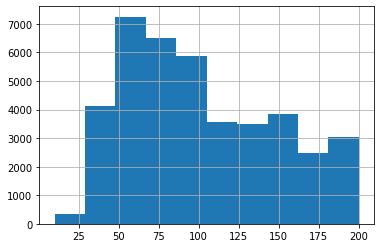

In [29]:
#Un 'zoom' en la variable del precio
dfg = df['price'] < 1000
df_price = df[dfg]
df_price.price.hist()
#A los departamentos / casas con precio 'cero' les imputamos el valor de la mediana que es 106, eran 11 registros.

In [30]:
df.columns.values.tolist()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [0]:
Numeric = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
            'calculated_host_listings_count','availability_365']
df_num = df[Numeric]

In [32]:
df_num.corr()
#No hay nada de correlación jajaja
# Sólo un poco entre número de vistas y número de vistas por mes, con lo que se podría inferir que vale la pena conservar ambas variables

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.105077,0.060515,0.022927,-0.007977,-0.014782,0.026553,-0.026913
longitude,0.105077,1.000000,-0.285876,-0.059003,0.047925,0.147939,-0.057217,0.120115
price,0.060515,-0.285876,1.000000,0.019693,0.007231,-0.041717,0.075255,0.006209
minimum_nights,0.022927,-0.059003,0.019693,1.000000,-0.078760,-0.110818,0.133524,0.135933
number_of_reviews,-0.007977,0.047925,0.007231,-0.078760,1.000000,0.581554,-0.054977,0.195845
reviews_per_month,-0.014782,0.147939,-0.041717,-0.110818,0.581554,1.000000,-0.042404,0.174849
calculated_host_listings_count,0.026553,-0.057217,0.075255,0.133524,-0.054977,-0.042404,1.000000,0.205909
availability_365,-0.026913,0.120115,0.006209,0.135933,0.195845,0.174849,0.205909,1.000000


In [33]:
#Ahora vamos a contemplar todas las variuable de interéspara nuestro modelo, numéricas y categóricas 

Variables = ['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews','latitude', 'longitude', 
             'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'price']
df_copy = df[Variables]
df_copy.head()

,neighbourhood_group,room_type,minimum_nights,number_of_reviews,latitude,longitude,reviews_per_month,calculated_host_listings_count,availability_365,price
0,Brooklyn,Private room,1,9,40.64749,-73.97237,0.21,6,365,149
1,Manhattan,Private room,3,0,40.80902,-73.94190,0.72,1,365,150
2,Brooklyn,Entire home/apt,1,270,40.68514,-73.95976,4.64,1,194,89
3,Manhattan,Entire home/apt,10,9,40.79851,-73.94399,0.10,1,0,80
4,Manhattan,Entire home/apt,3,74,40.74767,-73.97500,0.59,1,129,200


In [34]:
df_copy.shape

(40511, 10)

In [35]:
#Crearemos 8 variables dummie más por los 3 valores diferentes que toma la variable categórica 'room_type' y los 5 que
#toma la variable categórica 'neighbourhood_group'. Esto con la intención de trasnformarlas de categóricas a numéricas
#Se crean 8 variables numéricas y se eliminan 2 categóricas
df_dumm = pd.get_dummies(df_copy)
df_dumm.shape

(40511, 16)

In [36]:
df_dumm.head()

,minimum_nights,number_of_reviews,latitude,longitude,reviews_per_month,calculated_host_listings_count,availability_365,price,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,1,9,40.64749,-73.97237,0.21,6,365,149,0,1,0,0,0,0,1,0
1,3,0,40.80902,-73.94190,0.72,1,365,150,0,0,1,0,0,0,1,0
2,1,270,40.68514,-73.95976,4.64,1,194,89,0,1,0,0,0,1,0,0
3,10,9,40.79851,-73.94399,0.10,1,0,80,0,0,1,0,0,1,0,0
4,3,74,40.74767,-73.97500,0.59,1,129,200,0,0,1,0,0,1,0,0


# ***A partir de este punto se hace el Random Forest a los datos***

In [45]:
predictors = df_dumm[['reviews_per_month','latitude', 'longitude','minimum_nights','number_of_reviews', 'calculated_host_listings_count',
 'availability_365','neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
 'neighbourhood_group_Staten Island', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']]

targets = df_dumm.price

pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.14)
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=18)
classifier=classifier.fit(pred_train,tar_train)
predictions=classifier.predict(pred_test)

from sklearn import metrics
print(metrics.confusion_matrix(tar_test,predictions))
print(metrics.accuracy_score(tar_test, predictions))

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0 11 10]
 [ 0  0  0 ...  0  2 33]]
0.09326516220028208


In [0]:
model = ExtraTreesClassifier()
model.fit(pred_train,tar_train)
print(model.feature_importances_)
list(model.feature_importances_)

trees=range(25)
accuracy=np.zeros(25)

accuracy
#for idx in range(len(trees)):
#classifier = RandomForestClassifier(n_estimators=idx + 1)
#classifier = classifier.fit(pred_train,tar_train)
#predictions = classifier.predict(pred_test)
#accuracy[idx] = sklearn.metrics.accuracy_score(tar_test, predictions)

#plt.cla()
#plt.plot(trees, accuracy)


In [0]:
#En X tendremos a las variables regresoras y en 'y' al target (precio)
X = df_dumm.iloc[:, [0,1,2,3,4,5,6,8,9,10,11,12,13,14]].values
y = df_dumm.iloc[:, 7].values

In [0]:
#El tamaño de los datos de prueba es aquel con el que nuestro modelo resultó mejor evaluado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.14, random_state = 0)

In [0]:
#Valdría la pena el motivo por el cual estamos utilizando la Transformación minMax
minMax = MinMaxScaler()
X_train = minMax.fit_transform(X_train)
X_test = minMax.transform(X_test)

In [0]:
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [0]:
#Este modelo tiene una baja evaluación debido a la simpleza con la que hace predicciones del precio de los departamentos/casas
#no obstante, nótese que no hay mucha dispersión (varianza baja) de nuestras predicciones.
#En otras palabras, el modelo es simple, pero pronostica bien.
lr.score(X_test, y_test)

0.5123664006962407

In [0]:
scores = cross_val_score(lr, X, y, cv=10, scoring='r2')
#varianza estable
scores.std()

0.03170595665880883

In [0]:
#
scores.mean()

0.48899057553410197